In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from streamlit import columns
import seaborn as sns


df = pd.read_excel('Docs/13-19.05.xlsx', index_col="№")
print(len(df.columns))
df.head(5)

64


,Номер поставки,Предмет,Код номенклатуры,Бренд,Артикул поставщика,Название,Размер,Баркод,Тип документа,Обоснование для оплаты,...,ШК,Srid,Возмещение издержек по перевозке/по складским операциям с товаром,Организатор перевозки,Хранение,Удержания,Платная приемка,Фиксированный коэффициент склада по поставке,Признак продажи юридическому лицу,Номер короба для платной приемки
№,,,,,,,,,,,,,,,,,,,,,
1,18284151,Салфетки косметические,169315469,INSEENSE,insdent20s,Салфетки дентальные влажные детские 20 шт,0,4.650100e+12,NaN,Логистика,...,17980372508,10497428592363860.0.0,0.0,NaN,0.0,0,0,0,Нет,NaN
2,18284151,Салфетки косметические,169315469,INSEENSE,insdent20s,Салфетки дентальные влажные детские 20 шт,0,4.650100e+12,Продажа,Продажа,...,17980372508,10497428592363860.0.0,0.0,NaN,0.0,0,0,0,Нет,NaN
3,18512410,Пеленки для животных,18479885,INSEENSE,insdc6930insdc6930,"Пеленки одноразовые 60x90, 30 шт",0,4.650100e+12,NaN,Логистика,...,19384837757,f018d5f04bef40deb79f9e3021510020,0.0,NaN,0.0,0,0,0,Нет,NaN
4,18512410,Пеленки для животных,18479885,INSEENSE,insdc6930insdc6930,"Пеленки одноразовые 60x90, 30 шт",0,4.650100e+12,Продажа,Продажа,...,19384837757,f018d5f04bef40deb79f9e3021510020,0.0,NaN,0.0,0,0,0,Нет,NaN
5,19005616,Присыпки,212796641,INSEENSE,ins100gr/powder,Присыпка детская с ромашкой INSEENSE 100 гр.,0,4.650100e+12,NaN,Логистика,...,18036908051,5418486784568025449.3.0,0.0,NaN,0.0,0,0,0,Нет,NaN


df


In [2]:
minuses = df.loc[df['Удержания']!= 0]
columns_to_drop_by_WB_recommendation = [
    'Вайлдберриз реализовал Товар (Пр)',
    'Скидка постоянного Покупателя (СПП), %',
    'Размер снижения кВВ из-за рейтинга, %',
    'Размер снижения кВВ из-за акции, %',
    'Размер  кВВ без НДС, % Базовый',
    'Итоговый кВВ без НДС, %',
    'Вознаграждение с продаж до вычета услуг поверенного, без НДС',
    'Возмещение за выдачу и возврат товаров на ПВЗ',
    'Вознаграждение Вайлдберриз (ВВ), без НДС', 'НДС с Вознаграждения Вайлдберриз',
    'Возмещение издержек по перевозке/по складским операциям с товаром',
    'Наименование банка-эквайера',
    'Номер офиса',
    'Наименование офиса доставки',
    'ИНН партнера',
    'Партнер'
]

custom_columns_to_drop = [
    'Бренд',
    'Согласованный продуктовый дисконт, %',
    'Промокод %',
    'Итоговая согласованная скидка, %',
    'Цена розничная с учетом согласованной скидки',
    'Дата начала действия фиксации',
    'Дата конца действия фиксации',
    'Признак услуги платной доставки',
    'Стикер МП',
    'Номер таможенной декларации',
    'Номер сборочного задания',
    'Код маркировки',
    'Организатор перевозки',
    'Удержания',
    'Фиксированный коэффициент склада по поставке',
    'Признак продажи юридическому лицу',
    'Номер короба для платной приемки'
]
print(len(columns_to_drop_by_WB_recommendation+ custom_columns_to_drop))

df = df.drop(columns=columns_to_drop_by_WB_recommendation + custom_columns_to_drop)
df.head(5)

33


,Номер поставки,Предмет,Код номенклатуры,Артикул поставщика,Название,Размер,Баркод,Тип документа,Обоснование для оплаты,Дата заказа покупателем,...,Общая сумма штрафов,Доплаты,"Виды логистики, штрафов и доплат",Склад,Страна,Тип коробов,ШК,Srid,Хранение,Платная приемка
№,,,,,,,,,,,,,,,,,,,,,
1,18284151,Салфетки косметические,169315469,insdent20s,Салфетки дентальные влажные детские 20 шт,0,4.650100e+12,NaN,Логистика,2024-05-04,...,0,0,К клиенту при продаже,Электросталь,Россия,Моно,17980372508,10497428592363860.0.0,0.0,0
2,18284151,Салфетки косметические,169315469,insdent20s,Салфетки дентальные влажные детские 20 шт,0,4.650100e+12,Продажа,Продажа,2024-05-04,...,0,0,NaN,Электросталь,Россия,Моно,17980372508,10497428592363860.0.0,0.0,0
3,18512410,Пеленки для животных,18479885,insdc6930insdc6930,"Пеленки одноразовые 60x90, 30 шт",0,4.650100e+12,NaN,Логистика,2024-05-03,...,0,0,К клиенту при продаже,Электросталь,Россия,Монопалета,19384837757,f018d5f04bef40deb79f9e3021510020,0.0,0
4,18512410,Пеленки для животных,18479885,insdc6930insdc6930,"Пеленки одноразовые 60x90, 30 шт",0,4.650100e+12,Продажа,Продажа,2024-05-03,...,0,0,NaN,Электросталь,Россия,Монопалета,19384837757,f018d5f04bef40deb79f9e3021510020,0.0,0
5,19005616,Присыпки,212796641,ins100gr/powder,Присыпка детская с ромашкой INSEENSE 100 гр.,0,4.650100e+12,NaN,Логистика,2024-04-28,...,0,0,К клиенту при продаже,Электросталь,Россия,Моно,18036908051,5418486784568025449.3.0,0.0,0


In [3]:
df.columns = [i.replace(" ", "_") for i in df.columns]

english_columns = [
    "Supply_Number",                            # Номер_поставки
    "Item_type",                                # Предмет
    "Code",                                     # Код_номенклатуры
    "Supplier_Article",                         # Артикул_поставщика
    "Name",                                     # Название
    "Size",                                     # Размер
    "Barcode",                                  # Баркод
    "Document_Type",                            # Тип_документа
    "Payment_Justification",                    # Обоснование_для_оплаты
    "Buyer_Order_Date",                         # Дата_заказа_покупателем
    "Sale_Date",                                # Дата_продажи
    "Quantity",                                 # Кол-во
    "Retail_Price",                             # Цена_розничная
    "KVV_Percent",                              # Размер_кВВ,_%
    "Acquiring_Payment_Commission",             # Эквайринг/Комиссии_за_организацию_платежей
    "Acquiring_Payment_Commission_Percent",     # Размер_комиссии_за_эквайринг/Комиссии_за_организацию_платежей,_%
    "Acquiring_Payment_Type",                   # Тип_платежа_за_Эквайринг/Комиссии_за_организацию_платежей
    "Amount_To_Seller",                         # К_перечислению_Продавцу_за_реализованный_Товар
    "Number_of_Deliveries",                     # Количество_доставок
    "Number_of_Returns",                        # Количество_возврата
    "Delivery_Services",                        # Услуги_по_доставке_товара_покупателю
    "Total_Fines",                              # Общая_сумма_штрафов
    "Extra_Payments",                           # Доплаты
    "Types_of_Logistics_Fines_and_Extra_Payments",  # Виды_логистики,_штрафов_и_доплат
    "Warehouse",                                # Склад
    "Country",                                  # Страна
    "Box_Type",                                 # Тип_коробов
    "Scan_Code",                                # ШК
    "Srid",                                     # Srid
    "Storage",                                  # Хранение
    "Paid_Acceptance"                           # Платная_приемка
]

columns_dict = {}
for column_ru, column_eng in zip(df.columns, english_columns):
    print(f'{column_eng.lower()} - {column_ru}')
    df = df.rename(columns={column_ru : column_eng.lower()})
    columns_dict[column_eng] = column_ru

df.head(5)

supply_number - Номер_поставки
item_type - Предмет
code - Код_номенклатуры
supplier_article - Артикул_поставщика
name - Название
size - Размер
barcode - Баркод
document_type - Тип_документа
payment_justification - Обоснование_для_оплаты
buyer_order_date - Дата_заказа_покупателем
sale_date - Дата_продажи
quantity - Кол-во
retail_price - Цена_розничная
kvv_percent - Размер_кВВ,_%
acquiring_payment_commission - Эквайринг/Комиссии_за_организацию_платежей
acquiring_payment_commission_percent - Размер_комиссии_за_эквайринг/Комиссии_за_организацию_платежей,_%
acquiring_payment_type - Тип_платежа_за_Эквайринг/Комиссии_за_организацию_платежей
amount_to_seller - К_перечислению_Продавцу_за_реализованный_Товар
number_of_deliveries - Количество_доставок
number_of_returns - Количество_возврата
delivery_services - Услуги_по_доставке_товара_покупателю
total_fines - Общая_сумма_штрафов
extra_payments - Доплаты
types_of_logistics_fines_and_extra_payments - Виды_логистики,_штрафов_и_доплат
warehouse - Ск

,supply_number,item_type,code,supplier_article,name,size,barcode,document_type,payment_justification,buyer_order_date,...,total_fines,extra_payments,types_of_logistics_fines_and_extra_payments,warehouse,country,box_type,scan_code,srid,storage,paid_acceptance
№,,,,,,,,,,,,,,,,,,,,,
1,18284151,Салфетки косметические,169315469,insdent20s,Салфетки дентальные влажные детские 20 шт,0,4.650100e+12,NaN,Логистика,2024-05-04,...,0,0,К клиенту при продаже,Электросталь,Россия,Моно,17980372508,10497428592363860.0.0,0.0,0
2,18284151,Салфетки косметические,169315469,insdent20s,Салфетки дентальные влажные детские 20 шт,0,4.650100e+12,Продажа,Продажа,2024-05-04,...,0,0,NaN,Электросталь,Россия,Моно,17980372508,10497428592363860.0.0,0.0,0
3,18512410,Пеленки для животных,18479885,insdc6930insdc6930,"Пеленки одноразовые 60x90, 30 шт",0,4.650100e+12,NaN,Логистика,2024-05-03,...,0,0,К клиенту при продаже,Электросталь,Россия,Монопалета,19384837757,f018d5f04bef40deb79f9e3021510020,0.0,0
4,18512410,Пеленки для животных,18479885,insdc6930insdc6930,"Пеленки одноразовые 60x90, 30 шт",0,4.650100e+12,Продажа,Продажа,2024-05-03,...,0,0,NaN,Электросталь,Россия,Монопалета,19384837757,f018d5f04bef40deb79f9e3021510020,0.0,0
5,19005616,Присыпки,212796641,ins100gr/powder,Присыпка детская с ромашкой INSEENSE 100 гр.,0,4.650100e+12,NaN,Логистика,2024-04-28,...,0,0,К клиенту при продаже,Электросталь,Россия,Моно,18036908051,5418486784568025449.3.0,0.0,0


In [4]:
df.payment_justification.value_counts()

payment_justification
Логистика                                                            5467
Продажа                                                              5114
Возмещение издержек по перевозке/по складским операциям с товаром    4947
Компенсация потерянного товара                                        103
Штраф                                                                  33
Компенсация брака                                                      18
Хранение                                                                7
Удержание                                                               6
Компенсация подмененного товара                                         6
Корректировка эквайринга                                                3
Коррекция логистики                                                     2
Возврат                                                                 1
Name: count, dtype: int64

* Dataframe лучше разделять по payment_justification а для уточнения статей расходов и приходов:
    * document_type
    * types_of_logistics_fines_and_extra_payments

In [5]:
return_df = df[df.document_type.isnull()]
return_df.types_of_logistics_fines_and_extra_payments.value_counts()



types_of_logistics_fines_and_extra_payments
К клиенту при продаже                              5114
К клиенту при отмене                                172
От клиента при отмене                               172
Занижение фактических габаритов упаковки товара      32
Возврат брака (К продавцу)                            6
Возврат заблокированного товара (К продавцу)          2
коррекция логистики                                   2
От клиента при возврате                               1
Платное хранение возвратов на ПВЗ более 3 дней        1
Name: count, dtype: int64

In [6]:
# plt.hist()

df1 = return_df.loc[return_df['types_of_logistics_fines_and_extra_payments'] == 'Возврат (К продавцу)']
df1

# plt.hist(df1)


,supply_number,item_type,code,supplier_article,name,size,barcode,document_type,payment_justification,buyer_order_date,...,total_fines,extra_payments,types_of_logistics_fines_and_extra_payments,warehouse,country,box_type,scan_code,srid,storage,paid_acceptance
№,,,,,,,,,,,,,,,,,,,,,


* В таблице, если не указан документ, то все записи относятся только к возвратам

In [7]:
print(df[df.document_type.notnull()].document_type.value_counts())
sales_df = df[df.document_type.notnull()]
sales_df.payment_justification.value_counts()
df2 = sales_df.loc[sales_df['payment_justification'] == "Продажа", ['item_type', 'quantity']].groupby('item_type').sum()
df2




document_type
Продажа    5244
Возврат       1
Name: count, dtype: int64


,quantity
item_type,
Бумажные салфетки,51
Ватные диски,44
Ватные палочки,477
Влажные салфетки,186
Гели,3
Гели для стирки,8
Жидкое мыло,4
Клеенки детские,302
Кондиционеры для белья,1


In [8]:

df1 = df1.item_type.value_counts()
df1

Series([], Name: count, dtype: int64)

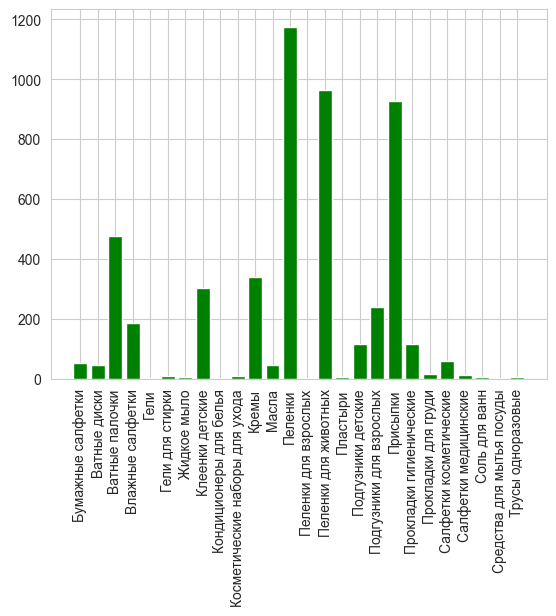

In [9]:



plt.bar(x=df2.index, height=df2.quantity, color='green')
plt.bar(x=df1.index, height=df1, color='red')
plt.xticks(rotation=90)
plt.show()


In [10]:
sales_df.item_type.value_counts()

item_type
Пеленки                           1221
Пеленки для животных               973
Присыпки                           971
Ватные палочки                     480
Кремы                              341
Клеенки детские                    302
Подгузники для взрослых            240
Влажные салфетки                   187
Прокладки гигиенические            124
Подгузники детские                 123
Бумажные салфетки                   60
Салфетки косметические              59
Ватные диски                        45
Масла                               44
Прокладки для груди                 17
Салфетки медицинские                11
Гели для стирки                      8
Косметические наборы для ухода       8
Трусы одноразовые                    7
Пластыри                             6
Соль для ванн                        6
Жидкое мыло                          6
Гели                                 3
Кондиционеры для белья               1
Средства для мытья посуды            1
Пеленки для взр

In [11]:
df.data

,supply_number,item_type,code,supplier_article,name,size,barcode,document_type,payment_justification,buyer_order_date,...,total_fines,extra_payments,types_of_logistics_fines_and_extra_payments,warehouse,country,box_type,scan_code,srid,storage,paid_acceptance
№,,,,,,,,,,,,,,,,,,,,,
1,18284151,Салфетки косметические,169315469,insdent20s,Салфетки дентальные влажные детские 20 шт,0,4.650100e+12,NaN,Логистика,2024-05-04,...,0,0,К клиенту при продаже,Электросталь,Россия,Моно,17980372508,10497428592363860.0.0,0.00,0
2,18284151,Салфетки косметические,169315469,insdent20s,Салфетки дентальные влажные детские 20 шт,0,4.650100e+12,Продажа,Продажа,2024-05-04,...,0,0,NaN,Электросталь,Россия,Моно,17980372508,10497428592363860.0.0,0.00,0
3,18512410,Пеленки для животных,18479885,insdc6930insdc6930,"Пеленки одноразовые 60x90, 30 шт",0,4.650100e+12,NaN,Логистика,2024-05-03,...,0,0,К клиенту при продаже,Электросталь,Россия,Монопалета,19384837757,f018d5f04bef40deb79f9e3021510020,0.00,0
4,18512410,Пеленки для животных,18479885,insdc6930insdc6930,"Пеленки одноразовые 60x90, 30 шт",0,4.650100e+12,Продажа,Продажа,2024-05-03,...,0,0,NaN,Электросталь,Россия,Монопалета,19384837757,f018d5f04bef40deb79f9e3021510020,0.00,0
5,19005616,Присыпки,212796641,ins100gr/powder,Присыпка детская с ромашкой INSEENSE 100 гр.,0,4.650100e+12,NaN,Логистика,2024-04-28,...,0,0,К клиенту при продаже,Электросталь,Россия,Моно,18036908051,5418486784568025449.3.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15703,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Штраф,2024-05-19,...,1007,0,Занижение фактических габаритов упаковки товара,NaN,NaN,NaN,0,fa148fc91a7098bd9e97fb89823d8f91306c9256,0.00,0
15704,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Штраф,2024-05-19,...,1007,0,Занижение фактических габаритов упаковки товара,NaN,NaN,NaN,0,66dfc6ad8f61a9de6f470bc1a1db1a605b83e938,0.00,0
15705,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Хранение,2024-05-19,...,0,0,NaN,NaN,NaN,NaN,0,b450a80ea06fe616db1b1c5769693a2ccd694823,4983.73,0
